In [1]:
import pandas as pd
import textstat
from collections import Counter
import numpy as np

In [2]:
data=pd.read_csv("arthur_conan_narrative_with_explaination.csv",usecols=['Document','Author', 'Book',
       'Narrative_GPT', 'Explanation',
       'Explanation_mistral.mixtral-8x7b-instruct-v0:1',
    'Explanation_arn:aws:bedrock:us-east-1:594264953269:inference-profile/us.meta.llama3-1-8b-instruct-v1:0',
    'Explanation_amazon.titan-text-express-v1'])
data = data.rename(columns={'Narrative_GPT': 'Narrative', 
                            'Explanation': 'Explanation_GPT',
                            'Explanation_mistral.mixtral-8x7b-instruct-v0:1':'Explanation_Mistral',
                           'Explanation_arn:aws:bedrock:us-east-1:594264953269:inference-profile/us.meta.llama3-1-8b-instruct-v1:0':'Explanation_Llama',
                            'Explanation_amazon.titan-text-express-v1':'Explanation_Titan'
                           })

data

,Document,Author,Book,Narrative,Explanation_GPT,Explanation_Mistral,Explanation_Llama,Explanation_Titan
0,The Adventure of the Devil's Foot By Sir Arthu...,Sir Arthur Conan Doyle,The Adventure of the Devil's Foot,Privacy vs. recognition (narrative) - Preferen...,"The passage from ""The Adventure of the Devil's...","The passage from ""The Adventure of the Devil'...","Here's a possible reasoning for the passage ""...",The passage highlights a narrative of an elega...
1,Tales of Terror and Mystery By Sir Arthur Cona...,Sir Arthur Conan Doyle,Tales of Terror and Mystery,Exploration of the unexplained and sinister (n...,The passage sets up a narrative that delves in...,"The narrative in the passage from ""Tales of T...","Based on the passage from ""Tales of Terror an...","The passage discusses the narrative setting, ..."
2,BEYOND THE CITY By Arthur Conan Doyle CHAPTER ...,Sir Arthur Conan Doyle,Beyond the City,Introduction to the neighborhood and observati...,"The narrative ""Introduction to the neighborhoo...","The narrative of the passage from ""Beyond the...","The passage ""BEYOND THE CITY"" by Arthur Conan...",The given passage falls under the narrative c...
3,UNCLE BERNAC A MEMORY OF THE EMPIRE CONTENTS C...,Sir Arthur Conan Doyle,Uncle Bernac,Exploration of memory and history (narrative) ...,"The narrative of ""Exploration of memory and hi...",Narrative: Revisiting the Past and Inherited ...,Here are a few sentences explaining why the p...,The passage discusses the contents of a lette...
4,"THE CABMAN'S STORY The Mysteries of a London ""...",Sir Arthur Conan Doyle,The Cabman's Story,Embarking on a family outing with overcast ski...,"The narrative ""Embarking on a family outing wi...","The narrative present in the passage from ""Th...","The passage has this narrative: ""Embarking on...","The narrative ""Crafting an identity and appea..."
5,THE WHITE COMPANY By Sir Arthur Conan Doyle CO...,Sir Arthur Conan Doyle,The White Company,Adventure and camaraderie in medieval England ...,"The narrative of ""Adventure and camaraderie in...","The narrative of ""Adventure and camaraderie i...","The passage from ""The White Company"" by Sir A...","The narrative ""Disruption from an outsider"" fi..."
6,THE WAR IN SOUTH AFRICA Its Cause and Conduct ...,Sir Arthur Conan Doyle,The War in South Africa,Documentation and justification of actions in ...,"The passage from ""The War in South Africa"" by ...","Reasoning:\n\nThe passage, titled 'The War in...",Here are a few sentences summarizing the reas...,The passage highlights the British Government'...
7,THE GREAT SHADOW AND OTHER NAPOLEONIC TALES A....,Sir Arthur Conan Doyle,The Great Shadow and Other Napoleonic Tales,Historical recollections and changing times (n...,"The narrative of ""Historical recollections and...",The narrative of 'Historical recollections an...,Here's a few sentence reasoning for the passa...,The passage highlights the contrast between t...
8,THROUGH THE MAGIC DOOR BY ARTHUR CONAN DOYLE I...,Sir Arthur Conan Doyle,Through the Magic Door,Entering a timeless realm through literature (...,"The narrative of ""Entering a timeless realm th...","The passage from ""Through the Magic Door"" by ...","The passage ""Through the Magic Door"" by Arthu...","In the passage, the author describes the magi..."
9,THE GREAT KEINPLATZ EXPERIMENT And Other Tales...,Sir Arthur Conan Doyle,The Great Keinplatz Experiment and Other Tales...,Exploration of the mystical and unknown (narra...,The exploration of mystical and unknown elemen...,"The passage from ""The Great Keinplatz Experim...","The passage ""THE GREAT KEINPLATZ EXPERIMENT A...",The passage you provided does not contain any ...


In [3]:
def calculate_entropy(text):
    tokens = text.split()
    token_counts = Counter(tokens)
    total_tokens = sum(token_counts.values())
    probabilities = np.array([count / total_tokens for count in token_counts.values()])
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

results = []
for index, row in data.iterrows():
    for model in ["Explanation_GPT", "Explanation_Mistral","Explanation_Llama","Explanation_Titan"]:
        explanation = row[model]
        
        flesch_score = textstat.flesch_reading_ease(explanation)
        fog_score = textstat.gunning_fog(explanation)
        entropy_score = calculate_entropy(explanation)
        
        results.append({
            "Document": row["Document"],
            "Narrative": row["Narrative"],
            "Model": model,
            "Flesch Reading Ease": flesch_score,
            "Gunning Fog Index": fog_score,
            "Entropy": entropy_score
        })

evaluation_df = pd.DataFrame(results)
evaluation_df

,Document,Narrative,Model,Flesch Reading Ease,Gunning Fog Index,Entropy
0,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,Explanation_GPT,26.64,19.73,6.052824
1,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,Explanation_Mistral,34.46,15.65,6.099565
2,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,Explanation_Llama,33.99,18.15,6.224454
3,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,Explanation_Titan,20.99,15.34,5.648540
4,Tales of Terror and Mystery By Sir Arthur Cona...,Exploration of the unexplained and sinister (n...,Explanation_GPT,18.32,21.01,5.994045
...,...,...,...,...,...,...
215,MEMOIRS OF SHERLOCK HOLMES by Sir Arthur Conan...,Preparation for a new investigation (narrative...,Explanation_Titan,28.17,18.48,5.692093
216,The Exploits of BRIGADIER GERARD SIR ARTHUR CO...,Chronicles of valor and adventure (narrative) ...,Explanation_GPT,13.96,22.00,5.789124
217,The Exploits of BRIGADIER GERARD SIR ARTHUR CO...,Chronicles of valor and adventure (narrative) ...,Explanation_Mistral,32.06,18.43,6.121162
218,The Exploits of BRIGADIER GERARD SIR ARTHUR CO...,Chronicles of valor and adventure (narrative) ...,Explanation_Llama,27.19,17.81,5.918710


In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

model = SentenceTransformer('all-MiniLM-L6-v2')

narratives = data["Narrative"].tolist()
explanations_gpt = data["Explanation_GPT"].tolist()
explanations_mistral = data["Explanation_Mistral"].tolist()
explanations_llama = data["Explanation_Llama"].tolist()
explanations_titan = data["Explanation_Titan"].tolist()

semantic_results = []
for i, narrative in enumerate(narratives):
    narrative_embedding = model.encode(narrative)
    gpt_embedding = model.encode(explanations_gpt[i])
    mistral_embedding = model.encode(explanations_mistral[i])
    llama_embedding = model.encode(explanations_llama[i])
    titan_embedding = model.encode(explanations_titan[i])
    
    gpt_similarity = cosine_similarity([narrative_embedding], [gpt_embedding])[0][0]
    mistral_similarity = cosine_similarity([narrative_embedding], [mistral_embedding])[0][0]
    llama_similarity = cosine_similarity([narrative_embedding], [llama_embedding])[0][0]
    titan_similarity = cosine_similarity([narrative_embedding], [titan_embedding])[0][0]
    
    semantic_results.append({
        "Document": data["Document"][i],
        "Narrative": narrative,
        "GPT_Similarity": gpt_similarity,
        "Mistral_Similarity": mistral_similarity,
        "Llama_Similarity":llama_similarity,
        "Titan_Similarity":titan_similarity
    })

semantic_df = pd.DataFrame(semantic_results)
semantic_df


/Users/jeeva/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


,Document,Narrative,GPT_Similarity,Mistral_Similarity,Llama_Similarity,Titan_Similarity
0,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,0.461612,0.537333,0.602869,0.336288
1,Tales of Terror and Mystery By Sir Arthur Cona...,Exploration of the unexplained and sinister (n...,0.729579,0.750155,0.831379,0.416545
2,BEYOND THE CITY By Arthur Conan Doyle CHAPTER ...,Introduction to the neighborhood and observati...,0.771692,0.704455,0.662505,0.872373
3,UNCLE BERNAC A MEMORY OF THE EMPIRE CONTENTS C...,Exploration of memory and history (narrative) ...,0.760794,0.559892,0.707085,0.278557
4,"THE CABMAN'S STORY The Mysteries of a London ""...",Embarking on a family outing with overcast ski...,0.699878,0.631082,0.820075,0.184512
5,THE WHITE COMPANY By Sir Arthur Conan Doyle CO...,Adventure and camaraderie in medieval England ...,0.773602,0.761849,0.696716,0.417308
6,THE WAR IN SOUTH AFRICA Its Cause and Conduct ...,Documentation and justification of actions in ...,0.638825,0.730518,0.580905,0.447455
7,THE GREAT SHADOW AND OTHER NAPOLEONIC TALES A....,Historical recollections and changing times (n...,0.764974,0.640570,0.580772,0.531518
8,THROUGH THE MAGIC DOOR BY ARTHUR CONAN DOYLE I...,Entering a timeless realm through literature (...,0.860623,0.770053,0.712692,0.531099
9,THE GREAT KEINPLATZ EXPERIMENT And Other Tales...,Exploration of the mystical and unknown (narra...,0.640907,0.616999,0.656288,0.372908


In [6]:
all_explanations = explanations_gpt + explanations_mistral + explanations_llama + explanations_titan

vectorizer = CountVectorizer(stop_words='english')
explanations_matrix = vectorizer.fit_transform(all_explanations)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(explanations_matrix)

topic_distributions = lda.transform(explanations_matrix)

topic_coherence_results = []
for i in range(len(explanations_gpt)):
    gpt_topics = topic_distributions[i]
    mistral_topics = topic_distributions[i + len(explanations_gpt)]
    llama_topics = topic_distributions[i + 2 * len(explanations_gpt)]
    titan_topics = topic_distributions[i + 3 * len(explanations_gpt)]
    
    gpt_mistral_diff = sum(abs(gpt_topics - mistral_topics))
    gpt_llama_diff = sum(abs(gpt_topics - llama_topics))
    gpt_titan_diff = sum(abs(gpt_topics - titan_topics))
    mistral_llama_diff = sum(abs(mistral_topics - llama_topics))
    mistral_titan_diff = sum(abs(mistral_topics - titan_topics))
    llama_titan_diff = sum(abs(llama_topics - titan_topics))
    
    topic_coherence_results.append({
        "Document": data["Document"][i],
        "Narrative": narratives[i],
        "GPT_Topics": gpt_topics.tolist(),
        "Mistral_Topics": mistral_topics.tolist(),
        "Llama_Topics": llama_topics.tolist(),
        "Titan_Topics": titan_topics.tolist(),
        "GPT-Mistral Difference": gpt_mistral_diff,
        "GPT-Llama Difference": gpt_llama_diff,
        "GPT-Titan Difference": gpt_titan_diff,
        "Mistral-Llama Difference": mistral_llama_diff,
        "Mistral-Titan Difference": mistral_titan_diff,
        "Llama-Titan Difference": llama_titan_diff
    })

topic_coherence_df = pd.DataFrame(topic_coherence_results)
topic_coherence_df

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Document,Narrative,GPT_Topics,Mistral_Topics,Llama_Topics,Titan_Topics,GPT-Mistral Difference,GPT-Llama Difference,GPT-Titan Difference,Mistral-Llama Difference,Mistral-Titan Difference,Llama-Titan Difference
0,The Adventure of the Devil's Foot By Sir Arthu...,Privacy vs. recognition (narrative) - Preferen...,"[0.009473632747162742, 0.9905263672528373]","[0.008417483207371243, 0.9915825167926289]","[0.007004910653745625, 0.9929950893462544]","[0.9889768063434454, 0.011023193656554672]",0.002112,0.004937,1.959006,0.002825,1.961119,1.963944
1,Tales of Terror and Mystery By Sir Arthur Cona...,Exploration of the unexplained and sinister (n...,"[0.02790410932441441, 0.9720958906755857]","[0.007241802183651155, 0.9927581978163489]","[0.008089568699641463, 0.9919104313003586]","[0.9961809491527391, 0.003819050847260915]",0.041325,0.039629,1.936554,0.001696,1.977878,1.976183
2,BEYOND THE CITY By Arthur Conan Doyle CHAPTER ...,Introduction to the neighborhood and observati...,"[0.6256512163724344, 0.37434878362756563]","[0.0142874391546104, 0.9857125608453896]","[0.010955574056820926, 0.9890444259431791]","[0.33374210328175935, 0.6662578967182406]",1.222728,1.229391,0.583818,0.006664,0.638909,0.645573
3,UNCLE BERNAC A MEMORY OF THE EMPIRE CONTENTS C...,Exploration of memory and history (narrative) ...,"[0.01097035365512434, 0.9890296463448757]","[0.0065838187733788765, 0.9934161812266211]","[0.008458659731271667, 0.9915413402687282]","[0.012520448839443348, 0.9874795511605566]",0.008773,0.005023,0.003100,0.003750,0.011873,0.008124
4,"THE CABMAN'S STORY The Mysteries of a London ""...",Embarking on a family outing with overcast ski...,"[0.9784494107995161, 0.021550589200483975]","[0.9906054964845755, 0.009394503515424613]","[0.9863881432094977, 0.013611856790502213]","[0.9861403198189002, 0.013859680181099785]",0.024312,0.015877,0.015382,0.008435,0.008930,0.000496
5,THE WHITE COMPANY By Sir Arthur Conan Doyle CO...,Adventure and camaraderie in medieval England ...,"[0.011444268851888172, 0.9885557311481118]","[0.009718030993372416, 0.9902819690066276]","[0.010049443651830517, 0.9899505563481695]","[0.9896189828304276, 0.010381017169572463]",0.003452,0.002790,1.956349,0.000663,1.959802,1.959139
6,THE WAR IN SOUTH AFRICA Its Cause and Conduct ...,Documentation and justification of actions in ...,"[0.9860659503956201, 0.013934049604379951]","[0.9224494635486227, 0.07755053645137734]","[0.8142586268408655, 0.18574137315913453]","[0.6957789253492829, 0.30422107465071707]",0.127233,0.343615,0.580574,0.216382,0.453341,0.236959
7,THE GREAT SHADOW AND OTHER NAPOLEONIC TALES A....,Historical recollections and changing times (n...,"[0.16403783859159568, 0.8359621614084044]","[0.08730462118123962, 0.9126953788187603]","[0.010878252511849746, 0.9891217474881503]","[0.22665502165577092, 0.7733449783442291]",0.153466,0.306319,0.125234,0.152853,0.278701,0.431554
8,THROUGH THE MAGIC DOOR BY ARTHUR CONAN DOYLE I...,Entering a timeless realm through literature (...,"[0.9842037471397855, 0.015796252860214466]","[0.9922846763984855, 0.007715323601514542]","[0.9908379035596836, 0.009162096440316425]","[0.9962215114466969, 0.003778488553303194]",0.016162,0.013268,0.024036,0.002894,0.007874,0.010767
9,THE GREAT KEINPLATZ EXPERIMENT And Other Tales...,Exploration of the mystical and unknown (narra...,"[0.008287146155649723, 0.9917128538443504]","[0.006723213840108758, 0.9932767861598912]","[0.004350313743117988, 0.9956496862568821]","[0.03762826603710555, 0.9623717339628944]",0.003128,0.007874,0.058682,0.004746,0.061810,0.066556


In [19]:
overall_evaluation = evaluation_df.groupby("Model").agg({
    "Flesch Reading Ease": "mean",
    "Gunning Fog Index": "mean",
    "Entropy": "mean"
}).reset_index()

semantic_summary = pd.DataFrame({
    "Model": ["Explanation_GPT", "Explanation_Mistral", "Explanation_Llama", "Explanation_Titan"],
    "Mean Semantic Similarity": [
        semantic_df["GPT_Similarity"].mean(),
        semantic_df["Mistral_Similarity"].mean(),
        semantic_df["Llama_Similarity"].mean(),
        semantic_df["Titan_Similarity"].mean()
    ]
})

mean_differences = {
    "Explanation_GPT": (topic_coherence_df["GPT-Mistral Difference"].mean() +
                        topic_coherence_df["GPT-Llama Difference"].mean() +
                        topic_coherence_df["GPT-Titan Difference"].mean()) / 3,
    "Explanation_Mistral": (topic_coherence_df["GPT-Mistral Difference"].mean() +
                            topic_coherence_df["Mistral-Llama Difference"].mean() +
                            topic_coherence_df["Mistral-Titan Difference"].mean()) / 3,
    "Explanation_Llama": (topic_coherence_df["GPT-Llama Difference"].mean() +
                          topic_coherence_df["Mistral-Llama Difference"].mean() +
                          topic_coherence_df["Llama-Titan Difference"].mean()) / 3,
    "Explanation_Titan": (topic_coherence_df["GPT-Titan Difference"].mean() +
                          topic_coherence_df["Mistral-Titan Difference"].mean() +
                          topic_coherence_df["Llama-Titan Difference"].mean()) / 3,
}

overall_evaluation["Mean Semantic Similarity"] = overall_evaluation["Model"].map(
    dict(zip(semantic_summary["Model"], semantic_summary["Mean Semantic Similarity"]))
)
overall_evaluation["Mean Topic Coherence Difference"] = overall_evaluation["Model"].map(mean_differences)


overall_evaluation

,Model,Flesch Reading Ease,Gunning Fog Index,Entropy,Mean Semantic Similarity,Mean Topic Coherence Difference
0,Explanation_GPT,14.337455,22.751091,5.913279,0.709102,0.417711
1,Explanation_Llama,35.434909,17.012545,5.975674,0.678027,0.400871
2,Explanation_Mistral,28.945818,18.132182,6.159219,0.670222,0.398861
3,Explanation_Titan,34.230364,16.511091,5.692184,0.439805,1.023395


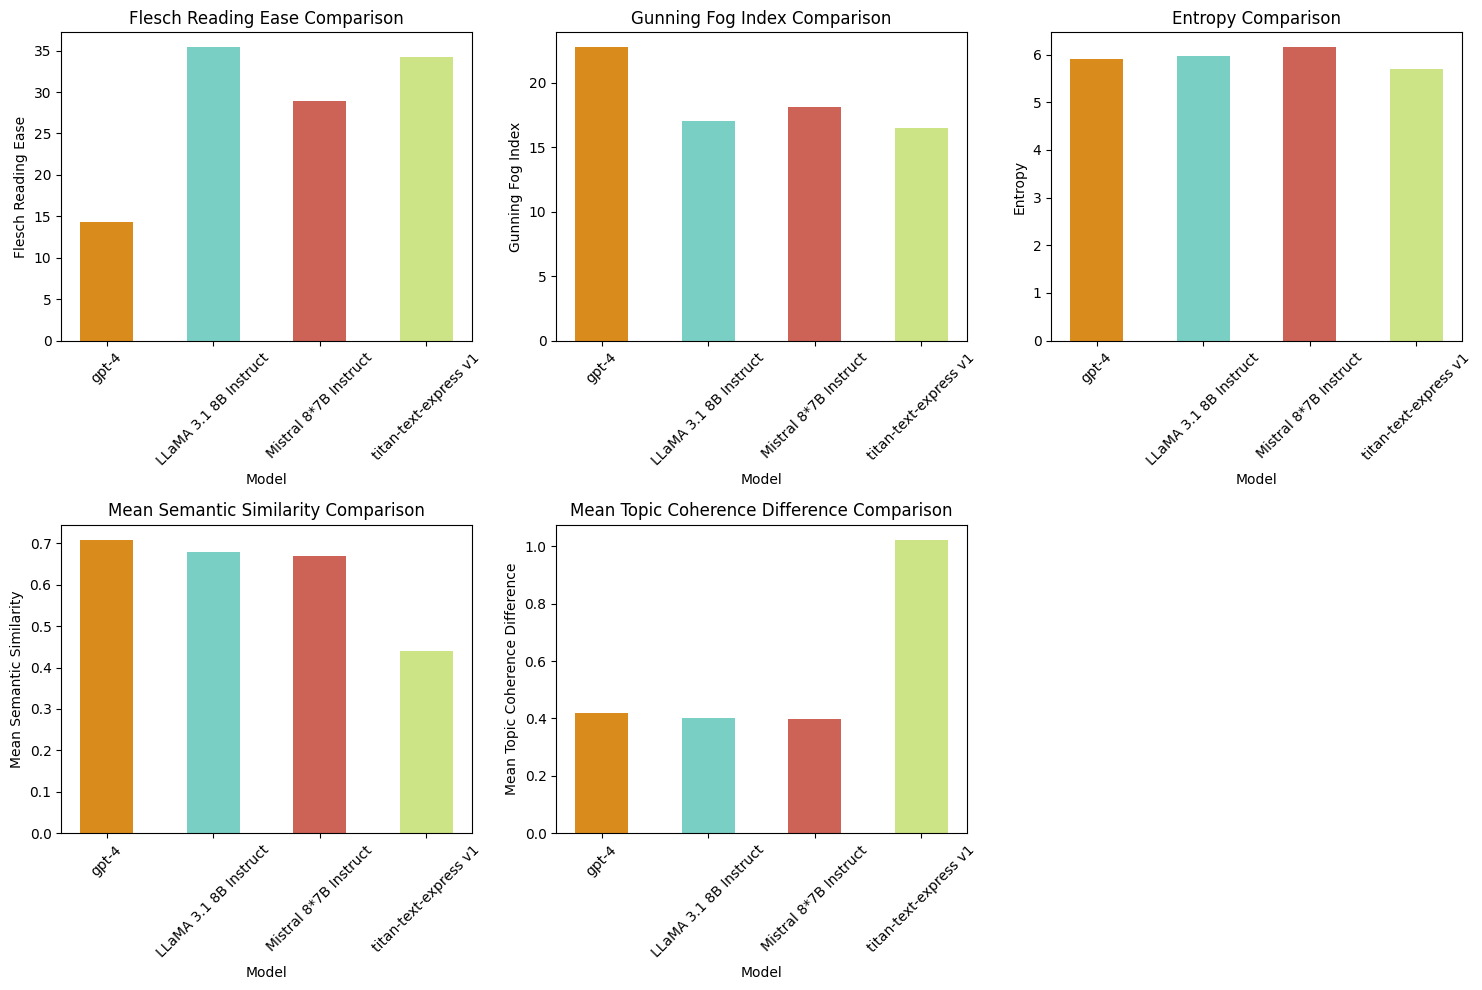

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample overall_evaluation DataFrame
data = {
    "Model": ["gpt-4", "LLaMA 3.1 8B Instruct", "Mistral 8*7B Instruct", "titan-text-express v1"],
    "Flesch Reading Ease": [14.337455, 35.434909, 28.945818, 34.230364],
    "Gunning Fog Index": [22.751091, 17.012545, 18.132182, 16.511091],
    "Entropy": [5.913279, 5.975674, 6.159219, 5.692184],
    "Mean Semantic Similarity": [0.709102, 0.678027, 0.670222, 0.439805],
    "Mean Topic Coherence Difference": [0.417711, 0.400871, 0.398861, 1.023395]
}
overall_evaluation = pd.DataFrame(data)

# Define colors for each model
colors = ["#D98C1C", "#7ACFC5", "#CD6257", "#CDE486"]  # Custom colors

# Define plots and metrics
metrics = ["Flesch Reading Ease", "Gunning Fog Index", "Entropy", 
           "Mean Semantic Similarity", "Mean Topic Coherence Difference"]
titles = [
    "Flesch Reading Ease Comparison",
    "Gunning Fog Index Comparison",
    "Entropy Comparison",
    "Mean Semantic Similarity Comparison",
    "Mean Topic Coherence Difference Comparison"
]

# Create subplots for 5 plots in a 2x3 layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten axes to easily iterate

# Generate each bar plot with custom width
bar_width = 0.5  # Set the width of the bars
for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i]
    ax.bar(overall_evaluation["Model"], overall_evaluation[metric], 
           color=colors, width=bar_width)
    ax.set_title(title)
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

# Turn off the 6th subplot (unused space)
axes[-1].axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
